# Implementing Lasso Regression

In [99]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV, Lasso
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import seaborn as sns
plt.style.use('ggplot')

In [100]:
# Utils
def average(lst): 
    return sum(lst) / len(lst) 
days = [1,2,3,4,5,6,7,14,21,28]
days_second = [5,6,7,14,21,28]
# IMPORTANT: Seeds to try
seeds = [1,2,3,4,5]
# Create a StandardScaler instance
scaler = StandardScaler()
normalizer = MinMaxScaler()

In [101]:
#Setting columns to use (see New_DB)
columns = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost', 'FBPosts', 'FBReactions', 'FBComments', 'FBShares', 'FBReactsPPost', 'FBCommsPPost', 'FBSharesPPost', 'IGPosts', 'IGLikes', 'IGLikesPPost', 'YTPosts', 'YTViews', 'YTViewsPPost', 'Target']

target = ['Target']

feature_columns_all = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost', 'FBPosts', 'FBReactions', 'FBComments', 'FBShares', 'FBReactsPPost', 'FBCommsPPost', 'FBSharesPPost', 'IGPosts', 'IGLikes', 'IGLikesPPost', 'YTPosts', 'YTViews', 'YTViewsPPost']

feature_columns_notall = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost', 'FBPosts', 'FBReactions', 'FBComments', 'FBShares', 'FBReactsPPost', 'FBCommsPPost', 'FBSharesPPost']

testing_columns = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost']

In [102]:
# Helper function for plotting feature importance
def plot_features(columns, importances, length):
    df = (pd.DataFrame({"features": columns, "feature_importance": importances}) .sort_values("feature_importance", ascending=False) .reset_index(drop=True))
    sns.barplot(x="feature_importance", y="features", data=df[:length], orient="h")
    

In [103]:
print(f"Number of features including only Facebook and X: {len(feature_columns_all)}")
print(f"Number of features including only Facebook and X: {len(feature_columns_notall)}")
print(f"Number of features including only Facebook and X: {len(testing_columns)}")

Number of features including only Facebook and X: 20
Number of features including only Facebook and X: 14
Number of features including only Facebook and X: 7


## Gálvez

In [104]:
model1 = Lasso(alpha = .1)
predictions = []
features_included = feature_columns_all
importances = [0] * len(features_included)

for i in days:
  # Scan the file and set data
  data = pd.read_csv(f'../galvez/2_{i}.csv', usecols=columns, encoding="utf-8")

  # Split data into training and testing sets
  training = data.iloc[:-1]
  testing = data.iloc[-1:].reset_index(drop=True)  # Ensure testing is a DataFrame for proper slicing

  # Features and target columns as NumPy arrays
  X_train = training[features_included].values
  X_test = testing[features_included].values
  y_train = training[target].values
  y_test = testing[target].values

  # Scaling features (will return arrays)
  x_train_scaled = scaler.fit_transform(X_train)
  x_test_scaled = scaler.transform(X_test)

  # Fit the model
  model1.fit(x_train_scaled, y_train)

  # Make a prediction (ensure X_test is also an array)
  prediction = model1.predict(x_test_scaled)

  predictions.append(prediction)

  importances = importances + model1.coef_

In [105]:
predictions

[array([28.10411364]),
 array([26.19840199]),
 array([32.04911882]),
 array([38.56853003]),
 array([31.26606058]),
 array([35.80268779]),
 array([34.64235344]),
 array([27.1319114]),
 array([32.61714267]),
 array([27.93788129])]

In [106]:
average(predictions)

array([31.43182017])

In [107]:
# Combine feature names with their corresponding coefficients
coefficients_df = pd.DataFrame({
    'Feature': features_included,
    'Coefficient': importances
})

In [108]:
coefficients_df

,Feature,Coefficient
0,XPosts,-4.750059
1,Xcomments,2.478801
2,XRts,3.177071
3,Xlikes,0.121858
4,XCommsPPost,2.535172
5,XRTsPPost,2.459811
6,XlikesPPost,-1.178804
7,FBPosts,1.680859
8,FBReactions,2.007331
9,FBComments,0.000000


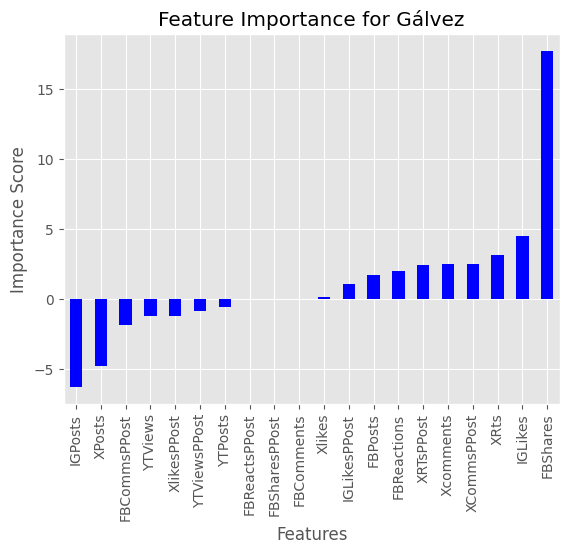

In [109]:
pd.Series(importances, feature_columns_all).sort_values(ascending = True).plot(kind = "bar", color="blue")
# Add titles
plt.xlabel("Features")  # X-axis title
plt.ylabel("Importance Score")  # Y-axis title
plt.title("Feature Importance for Gálvez")  # Chart title
plt.show();

## Sheinbaum

In [110]:
model1 = Lasso(alpha = .1)
predictions = []
features_included = feature_columns_all
importances = [0] * len(features_included)

for i in days:
  # Scan the file and set data
  data = pd.read_csv(f'../claudia/1_{i}.csv', usecols=columns, encoding="utf-8")

  # Split data into training and testing sets
  training = data.iloc[:-1]
  testing = data.iloc[-1:].reset_index(drop=True)  # Ensure testing is a DataFrame for proper slicing

  # Features and target columns as NumPy arrays
  X_train = training[features_included].values
  X_test = testing[features_included].values
  y_train = training[target].values
  y_test = testing[target].values

  # Scaling features (will return arrays)
  x_train_scaled = scaler.fit_transform(X_train)
  x_test_scaled = scaler.transform(X_test)

  # Fit the model
  model1.fit(x_train_scaled, y_train)

  # Make a prediction (ensure X_test is also an array)
  prediction = model1.predict(x_test_scaled)

  predictions.append(prediction)

  importances = importances + model1.coef_

In [111]:
predictions

[array([36.71802863]),
 array([38.53163006]),
 array([42.30007037]),
 array([41.40541966]),
 array([38.75905533]),
 array([40.90348463]),
 array([42.88677328]),
 array([42.07643871]),
 array([43.53568718]),
 array([46.79729709])]

In [112]:
average(predictions)

array([41.39138849])

In [113]:
# Combine feature names with their corresponding coefficients
coefficients_df = pd.DataFrame({
    'Feature': features_included,
    'Coefficient': importances
})

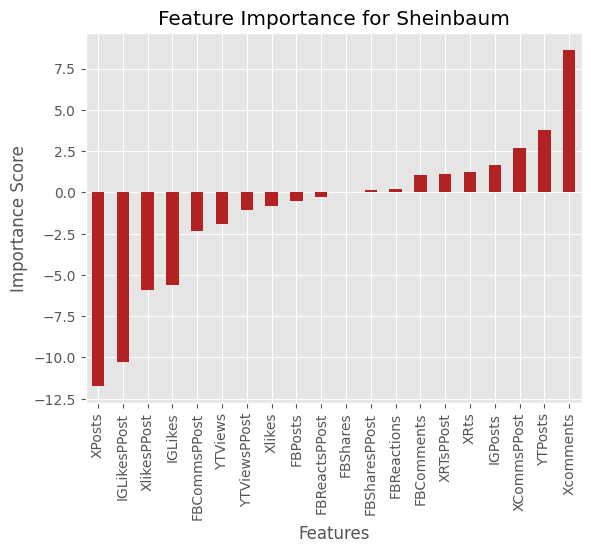

In [114]:
pd.Series(importances, feature_columns_all).sort_values(ascending = True).plot(kind = "bar", color="firebrick")
# Add titles
plt.xlabel("Features")  # X-axis title
plt.ylabel("Importance Score")  # Y-axis title
plt.title("Feature Importance for Sheinbaum")  # Chart title
plt.show();

## Álvarez Máynez

In [115]:
model1 = Lasso(alpha = .1)
predictions = []
features_included = feature_columns_all
importances = [0] * len(features_included)

for i in days:
  # Scan the file and set data
  data = pd.read_csv(f'../maynez/3_{i}.csv', usecols=columns, encoding="utf-8")

  # Split data into training and testing sets
  training = data.iloc[:-1]
  testing = data.iloc[-1:].reset_index(drop=True)  # Ensure testing is a DataFrame for proper slicing

  # Features and target columns as NumPy arrays
  X_train = training[features_included].values
  X_test = testing[features_included].values
  y_train = training[target].values
  y_test = testing[target].values

  # Scaling features (will return arrays)
  x_train_scaled = scaler.fit_transform(X_train)
  x_test_scaled = scaler.transform(X_test)

  # Fit the model
  model1.fit(x_train_scaled, y_train)

  # Make a prediction (ensure X_test is also an array)
  prediction = model1.predict(x_test_scaled)

  predictions.append(prediction)

  importances = importances + model1.coef_

In [116]:
average(predictions)

array([8.62564961])

In [117]:
# Combine feature names with their corresponding coefficients
coefficients_df = pd.DataFrame({
    'Feature': features_included,
    'Coefficient': importances
})

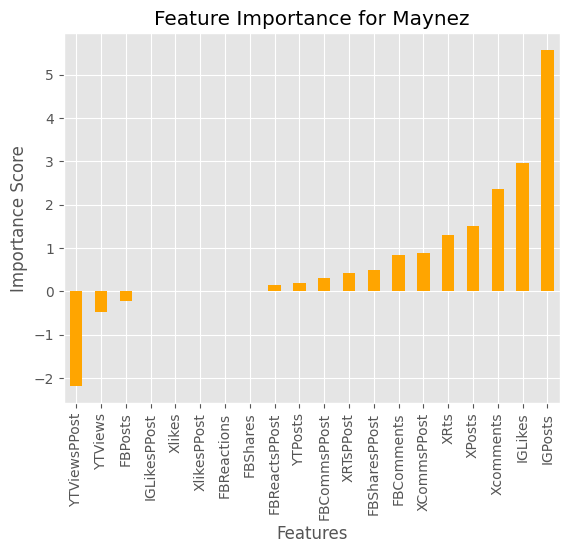

In [118]:
pd.Series(importances, feature_columns_all).sort_values(ascending = True).plot(kind = "bar", color="orange")
# Add titles
plt.xlabel("Features")  # X-axis title
plt.ylabel("Importance Score")  # Y-axis title
plt.title("Feature Importance for Maynez")  # Chart title
plt.show();